In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
""" pd.read_excel('OC.xlsx', sheet_name='2022')['JURISDICTION'].unique()

name_list = ['ALISO VIEJO', 'ANAHEIM', 'BREA', 'BUENA PARK', 'COSTA MESA',
       'CYPRESS', 'DANA POINT', 'FOUNTAIN VALLEY', 'FULLERTON',
       'GARDEN GROVE', 'HUNTINGTON BEACH', 'IRVINE', 'LA HABRA',
       'LA PALMA', 'LAGUNA BEACH', 'LAGUNA HILLS', 'LAGUNA NIGUEL',
       'LAGUNA WOODS', 'LAKE FOREST', 'LOS ALAMITOS', 'MISSION VIEJO',
       'NEWPORT BEACH', 'ORANGE', 'PLACENTIA', 'RANCHO SANTA MARGARITA',
       'SAN CLEMENTE', 'SAN JUAN CAPISTRANO', 'SANTA ANA', 'SEAL BEACH',
       'STANTON', 'TUSTIN', 'VILLA PARK', 'WESTMINSTER', 'YORBA LINDA',
       'ORANGE COUNTY', 'OTHER STATE AGENCY', 'STATE HIGHWAY',
       'STATE PARK SERVICE', 'U.S. FOREST SERVICE'] """

" pd.read_excel('OC.xlsx', sheet_name='2022')['JURISDICTION'].unique()\n\nname_list = ['ALISO VIEJO', 'ANAHEIM', 'BREA', 'BUENA PARK', 'COSTA MESA',\n       'CYPRESS', 'DANA POINT', 'FOUNTAIN VALLEY', 'FULLERTON',\n       'GARDEN GROVE', 'HUNTINGTON BEACH', 'IRVINE', 'LA HABRA',\n       'LA PALMA', 'LAGUNA BEACH', 'LAGUNA HILLS', 'LAGUNA NIGUEL',\n       'LAGUNA WOODS', 'LAKE FOREST', 'LOS ALAMITOS', 'MISSION VIEJO',\n       'NEWPORT BEACH', 'ORANGE', 'PLACENTIA', 'RANCHO SANTA MARGARITA',\n       'SAN CLEMENTE', 'SAN JUAN CAPISTRANO', 'SANTA ANA', 'SEAL BEACH',\n       'STANTON', 'TUSTIN', 'VILLA PARK', 'WESTMINSTER', 'YORBA LINDA',\n       'ORANGE COUNTY', 'OTHER STATE AGENCY', 'STATE HIGHWAY',\n       'STATE PARK SERVICE', 'U.S. FOREST SERVICE'] "

In [2]:
def OC_info(jursdiction):
    mileage_data = []
    VMT_data = []

    for year in range(2001, 2023):
        sheet_name = f'{year}'
        df = pd.read_excel('OC.xlsx', sheet_name=sheet_name)
        selection = df[df['JURISDICTION'] == jursdiction]
        
        MILES_TOTAL_value = selection['MILES TOTAL'].iloc[0]
        DVMT_value = selection['DVMT TOTAL'].iloc[0] # if not select.empty else None

        mileage_data.append({'Year': year, 'Miles': MILES_TOTAL_value})
        VMT_data.append({'Year': year, 'VMT': DVMT_value*1000*365})

        #print(f'{year} done')

    mileage_merged = pd.DataFrame(mileage_data)
    VMT_merged = pd.DataFrame(VMT_data)

    fig, ax1 = plt.subplots()

    ax1.plot(VMT_merged['Year'], VMT_merged['VMT'], color='b', label='VMT')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('VMT', color='b')
    #ax1.tick_params('y', colors='b')

    ax2 = ax1.twinx()
    ax2.plot(mileage_merged['Year'], mileage_merged['Miles'], color='r', label='Miles')
    ax2.set_ylabel('Miles', color='r')
    #ax2.tick_params('y', colors='r')

    plt.title(f'Jursdiction of {jursdiction}: VMT / Miles')
    #plt.legend(loc='upper left')

    plt.show()

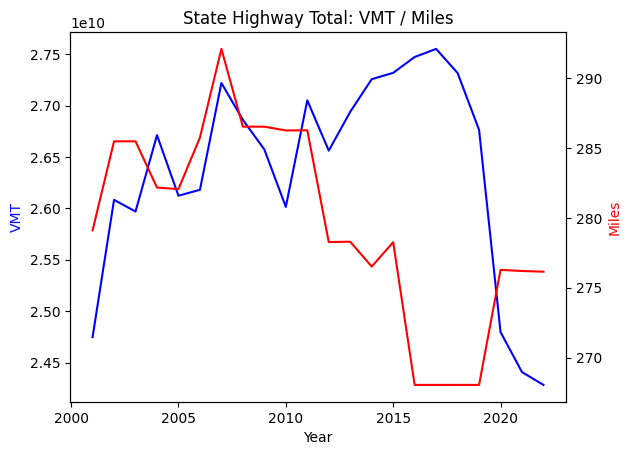

In [14]:
def OC_main_info():
    mileage_data = []
    VMT_data = []

    for year in range(2001, 2023):
        sheet_name = f'{year}'
        df = pd.read_excel('OC.xlsx', sheet_name=sheet_name)

        road_selection = df[df['JURISDICTION']=='STATE HIGHWAY']
        selection = df[df['COUNTY']=='ORANGE TOTAL']
        
        MILES_TOTAL_value = road_selection['MILES TOTAL'].iloc[0]
        #MILES_TOTAL_value = selection['MILES TOTAL'].iloc[0]
        DVMT_value = selection['DVMT TOTAL'].iloc[0] # if not select.empty else None

        mileage_data.append({'Year': year, 'Miles': MILES_TOTAL_value})
        VMT_data.append({'Year': year, 'VMT': DVMT_value*1000*365})

        #print(f'{year} done')

    mileage_merged = pd.DataFrame(mileage_data)
    VMT_merged = pd.DataFrame(VMT_data)

    fig, ax1 = plt.subplots()

    ax1.plot(VMT_merged['Year'], VMT_merged['VMT'], color='b', label='VMT')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('VMT', color='b')
    #ax1.tick_params('y', colors='b')

    ax2 = ax1.twinx()
    ax2.plot(mileage_merged['Year'], mileage_merged['Miles'], color='r', label='Miles')
    ax2.set_ylabel('Miles', color='r')
    #ax2.tick_params('y', colors='r')

    plt.title('State Highway Total: VMT / Miles')
    # plt.title('ORANGE COUNTY Total: VMT / Miles')
    #plt.legend(loc='upper left')

    plt.show()

OC_main_info()

In [11]:
def OC_main_info():
    mileage_data = []
    VMT_data = []

    for year in range(2001, 2023):
        sheet_name = f'{year}'
        df = pd.read_excel('OC.xlsx', sheet_name=sheet_name)

        # road_selection = df[df['JURISDICTION'] == 'STATE HIGHWAY']
        selection = df[df['COUNTY'] == 'ORANGE TOTAL']

        ## Ensure selection or road_selection is used for MILES_TOTAL_value for individual jurisdiction vs entire county.

        MILES_TOTAL_value = selection['MILES TOTAL'].iloc[0]
        DVMT_value = selection['DVMT TOTAL'].iloc[0]

        mileage_data.append({'Year': year, 'Highway Miles': MILES_TOTAL_value})
        VMT_data.append({'Year': year, 'Highway VMT': DVMT_value * 1000 * 365})

    mileage_merged = pd.DataFrame(mileage_data)
    VMT_merged = pd.DataFrame(VMT_data)

    # Merge the two DataFrames on the 'Year' column
    merged_df = pd.merge(mileage_merged, VMT_merged, on='Year')

    return merged_df

merged_df = OC_main_info()

# Print the merged DataFrame
merged_df.to_excel('OC_CalTrans_cty_road_data.xlsx')


In [4]:
mileage_data = []
VMT_data = []

for year in range(2001, 2023):
    sheet_name = f'{year}'
    df = pd.read_excel('OC.xlsx', sheet_name=sheet_name)

    road_selection = df[df['JURISDICTION']=='STATE HIGHWAY']
    selection = df[df['COUNTY']=='ORANGE TOTAL']
    
    MILES_TOTAL_value = road_selection['MILES TOTAL'].iloc[0]
    #MILES_TOTAL_value = selection['MILES TOTAL'].iloc[0]
    DVMT_value = selection['DVMT TOTAL'].iloc[0] # if not select.empty else None

    mileage_data.append({'Year': year, 'Miles': MILES_TOTAL_value})
    VMT_data.append({'Year': year, 'VMT': DVMT_value*1000*365})

    #print(f'{year} done')

mileage_merged = pd.DataFrame(mileage_data)
VMT_merged = pd.DataFrame(VMT_data)

OC_merged = pd.merge(mileage_merged, VMT_merged, on= 'Year')

factors = pd.merge(OC_merged, pd.read_excel('CAORAN.xlsx'), left_on='Year', right_on='observation_date').drop(columns=['observation_date', 'GDPALL06059', 'CANGSP', 'CARGSP','LAUCN060590000000003A'])
factors = factors.rename(columns = {
        'CAORAN7POP': 'County Population',
        'REALGDPALL06059': 'Real GDP',
        'LAUCN060590000000005A': 'Employed Persons',
        'MHICA06059A052NCEN': 'Median Income'
    })

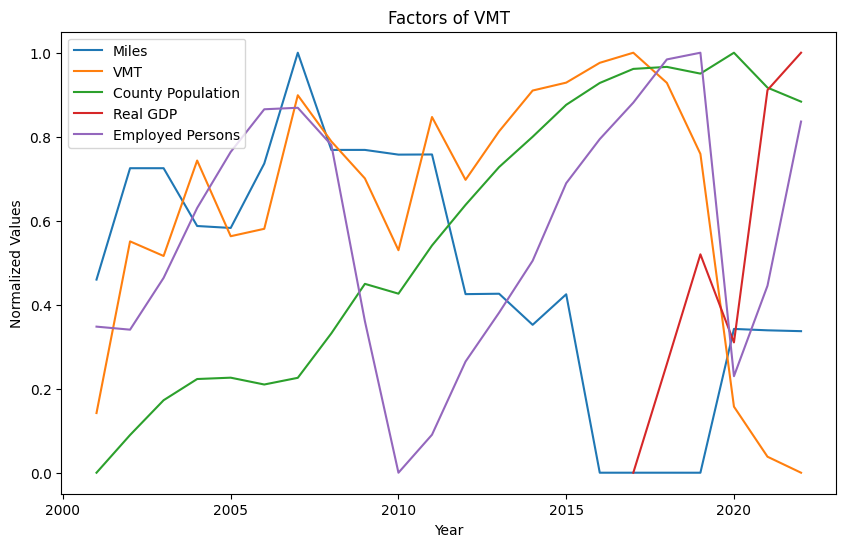

In [12]:
columns_plot = ['Miles', 'VMT', 'County Population', 'Real GDP', 'Employed Persons']

scaler = MinMaxScaler()
factors[columns_plot] = scaler.fit_transform(factors[columns_plot])

plt.figure(figsize=(10, 6))
for column in columns_plot:
    plt.plot(factors['Year'], factors[column], label=column)

plt.title('Factors of VMT')
plt.xlabel('Year')
plt.ylabel('Normalized Values')
plt.legend(loc='upper left')
plt.show()